# Выбор региона для разработки скважины

## Загрузка и подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# чтение файлов с данными и сохранение
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# получение общей информации
print('{:^50}'.format('df0'))
print(df0.info())
print('{:^50}'.format('df1'))
print(df1.info())
print('{:^50}'.format('df1'))
print(df1.info())

                       df0                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                       df1                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                       df1                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-nu

- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек;
- `product` — объём запасов в скважине (тыс. баррелей).

In [4]:
# визуальная проверка
print('{:^50}'.format('df0'))
print(df0.head(3), '\n')
print('{:^50}'.format('df1'))
print(df1.head(3), '\n')
print('{:^50}'.format('df1'))
print(df2.head(3), '\n')

                       df0                        
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647 

                       df1                        
      id         f0        f1        f2     product
0  kBEdx -15.001348 -8.276000 -0.005876    3.179103
1  62mP7  14.272088 -3.475083  0.999183   26.953261
2  vyE1P   6.263187 -5.948386  5.001160  134.766305 

                       df1                        
      id        f0        f1        f2    product
0  fwXo0 -1.146987  0.963328 -0.828965  27.758673
1  WJtFt  0.262778  0.269839 -2.530187  56.069697
2  ovLUW  0.194587  0.289035 -5.586433  62.871910 



Во всех таблицах нет пропусков, типы данных соответствуют ожидаемым. Посмотрим на числовое описание данных

In [5]:
print('{:^50}'.format('Регион №0'))
df0.describe()

                    Регион №0                     


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
print('{:^50}'.format('Регион №1'))
df1.describe()

                    Регион №1                     


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [7]:
print('{:^50}'.format('Регион №2'))
df2.describe()

                    Регион №2                     


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


                    Регион №0                     


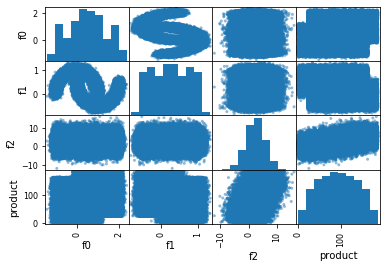

In [8]:
print('{:^50}'.format('Регион №0'))
pd.plotting.scatter_matrix(df0)
plt.show()

                    Регион №1                     


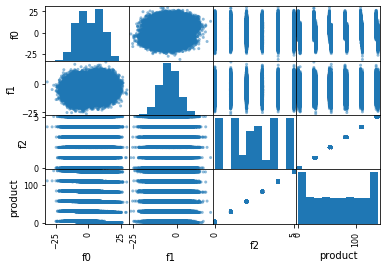

In [9]:
print('{:^50}'.format('Регион №1'))
pd.plotting.scatter_matrix(df1)
plt.show()

                    Регион №2                     


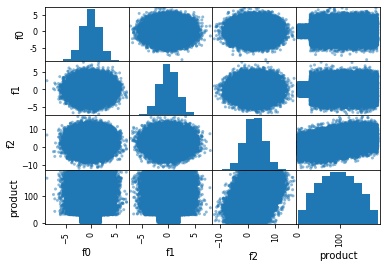

In [10]:
print('{:^50}'.format('Регион №2'))
pd.plotting.scatter_matrix(df2)
plt.show()

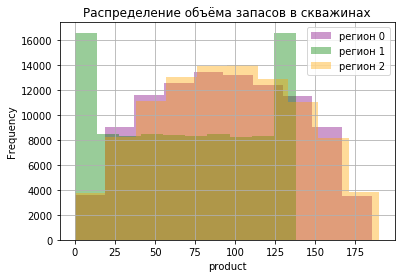

In [11]:
ax = df0['product'].plot(kind='hist', grid=True, legend=True, label='регион 0', color='purple', alpha=0.4)
df1['product'].plot(kind='hist', grid=True, ax=ax, legend=True, label='регион 1', color='green', alpha=0.4)
df2['product'].plot(kind='hist', grid=True, ax=ax, legend=True, label='регион 2', color='orange', alpha=0.4)
plt.title('Распределение объёма запасов в скважинах')
plt.xlabel('product')
plt.show()

**Вывод**

Регионы 0 и 2 имеют довольно похожие картины. Регион 1 отличается и распределением объема запасов сырья (оно смещено относительно двух других регионов, мееет меньшее среднее, меньшее максимальное значение и имеет всплески в начале и в конце своего распределенения), и ярко выраженной корреляцией между объемом запасов и признаком f2. Объемы запасов во всех регионах имееют std около 44 - 46. 

Выделим целевой признак и признаки для модели (столбец id не понадобиться для прогнозирования)

In [12]:
# целевой признак
target0 = df0['product']
target1 = df1['product']
target2 = df2['product']
# признаки
features0 = df0.drop(['product', 'id'], axis=1)
features1 = df1.drop(['product', 'id'], axis=1)
features2 = df2.drop(['product', 'id'], axis=1)

## Обучение и проверка модели

Разобьем данные на обучающую и тестовую выборки (в каждом регионе)

In [13]:
# выделение обучающей выборки
features0_train, features0_test, target0_train, target0_test = train_test_split(
    features0, target0, test_size=0.25, random_state=12345)
features1_train, features1_test, target1_train, target1_test = train_test_split(
    features1, target1, test_size=0.25, random_state=12345)
features2_train, features2_test, target2_train, target2_test = train_test_split(
    features2, target2, test_size=0.25, random_state=12345)
# проверка размера
print('Размер обучающей выборки:', features0_train.shape)
print('Размер валидационной выборки:', features0_test.shape)

Размер обучающей выборки: (75000, 3)
Размер валидационной выборки: (25000, 3)


Отмасштабируем числовые признаки с помощью z-преобразования. Таким образом все количественные признаки для алгоритма станут более равноценными. Метод StandardScaler() возвращает массив, мы же будем работать с таблицей

In [14]:
columns = ['f0', 'f1', 'f2']

In [15]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

scaler.fit(features0_train)
features0_train = pd.DataFrame(scaler.transform(features0_train), columns=columns)
features0_test = pd.DataFrame(scaler.transform(features0_test), columns=columns)

scaler.fit(features1_train)
features1_train = pd.DataFrame(scaler.transform(features1_train), columns=columns)
features1_test = pd.DataFrame(scaler.transform(features1_test), columns=columns)

scaler.fit(features2_train)
features2_train = pd.DataFrame(scaler.transform(features2_train), columns=columns)
features2_test = pd.DataFrame(scaler.transform(features2_test), columns=columns)

In [16]:
features2_train.head(3)

,f0,f1,f2
0,-0.526160,0.776329,-0.400793
1,-0.889625,-0.404070,-1.222936
2,-1.133984,0.208576,0.296765


Создаем модель. 

In [17]:
# создение моделей линейной регрессии
model = LinearRegression()

In [18]:
# перекрестная оценка
print('оценка точности: регион №0', round(cross_val_score(model, features0_train, target0_train, cv=5).mean(), 4))
print('оценка точности: регион №1', round(cross_val_score(model, features1_train, target1_train, cv=5).mean(), 4))
print('оценка точности: регион №2', round(cross_val_score(model, features2_train, target2_train, cv=5).mean(), 4))

оценка точности: регион №0 0.2741
оценка точности: регион №1 0.9996
оценка точности: регион №2 0.1965


С помощью кросс-валидации предсказываем данные для тестовой выборки

In [19]:
# предсказания на валидационной выборке
predictions0 = cross_val_predict(model, features0_test, target0_test, cv=5)
predictions1 = cross_val_predict(model, features1_test, target1_test, cv=5)
predictions2 = cross_val_predict(model, features2_test, target2_test, cv=5)

Сохраняем предсказания и правильные ответы

In [20]:
results0 = pd.DataFrame([], columns = [])
results0['true'] = target0_test
results0['predictions'] = predictions0

results1 = pd.DataFrame([], columns = [])
results1['true'] = target1_test
results1['predictions'] = predictions1

results2 = pd.DataFrame([], columns = [])
results2['true'] = target2_test
results2['predictions'] = predictions2

Считаем RMSE

In [21]:
rmse0 = mean_squared_error(results0['true'], results0['predictions'])**0.5
rmse1 = mean_squared_error(results1['true'], results1['predictions'])**0.5
rmse2 = mean_squared_error(results2['true'], results2['predictions'])**0.5

Соберем все в таблицу

In [22]:
result = pd.DataFrame(
    [
        [0, target0_test.mean(), predictions0.mean(), rmse0],
        [1, target1_test.mean(), predictions1.mean(), rmse1],
        [2, target2_test.mean(), predictions2.mean(), rmse2]
    ],
    columns = ['Регион', 'Настоящее среднее', 'Предсказаное среднее', 'RMSE'], 
).round(5)

In [23]:
result

,Регион,Настоящее среднее,Предсказаное среднее,RMSE
0,0,92.07860,92.07938,37.57485
1,1,68.72314,68.72314,0.89320
2,2,94.88423,94.88226,40.03125


**Вывод**


- Для регионов № 0 и №2 ошибка RMSE довольно большая (практически половина от значения). Регион №1 имеет очень маленькую RMSE (менее 1). Вероятно, это связано с сильной корреляцией целевого признака с признаком f2 для этого региона.
- Предсказанное средние значение у региона № 1, так же как и для истинного среднего, меньше, чем в других регионах.

## Подготовка к расчёту прибыли

In [24]:
# Бюджет на разработку скважин в регионе
DEVELOPMENT_PRICE = 10**10
# Доход с одного барреля сырья 
ONE_BARREL = 450
# Доход с каждой единицы продукта
INCOME_PER_UNIT = 450000
# чилсо новых скважин
N_WELL = 200
# число скважин для исследования
N_RESEARCH = 500

Расчитаем достаточный объём сырья для безубыточной разработки новой скважины. Для того, чтобы разработка была безубыточной необходимо, чтобы затраты на разработку не превышали выручку от сырья (в контексте данной задачи). На разработку скважин в регионе выделяется 10 млрд., всего выбирают 200 скважин для разработки в регионе. Доход с каждой тысячи бареллей - 450 тыс. рублей. Таким образом, объем сырья для безубыточной разработки новой скважины должен быть 

In [25]:
v_min = round(DEVELOPMENT_PRICE / N_WELL / INCOME_PER_UNIT, 5)
v_min

111.11111

Попробуем сравнить это значение с предсказанными средними значениями

In [26]:
result

,Регион,Настоящее среднее,Предсказаное среднее,RMSE
0,0,92.07860,92.07938,37.57485
1,1,68.72314,68.72314,0.89320
2,2,94.88423,94.88226,40.03125


Проверка гипотезы с помощью двустороннего t-теста (средние выборочные распредлены нормально по ЦПТ)

- Гипотеза H0: $\mu$ = v_min (предсказанное среднее равно достаточному объёму сырья для безубыточной разработки новой скважины v_min)
- Гипотеза Н1: $\mu$ $\neq$ v_min

Уровень значимости $\alpha$ = 0.05

In [27]:
answer0 = st.ttest_1samp(results0['predictions'], v_min)
answer1 = st.ttest_1samp(results1['predictions'], v_min)
answer2 = st.ttest_1samp(results2['predictions'], v_min)

alpha = 0.05

if answer0.pvalue < alpha:
    print('Отвергаем нулевую гипотезу для региона 0')
else:
    print('Не получилось отвергнуть нулевую гипотезу 0') 
    
if answer1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу для региона 1')
else:
    print('Не получилось отвергнуть нулевую гипотезу 1') 
    
if answer2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу для региона 2')
else:
    print('Не получилось отвергнуть нулевую гипотезу 2') 

Отвергаем нулевую гипотезу для региона 0
Отвергаем нулевую гипотезу для региона 1
Отвергаем нулевую гипотезу для региона 2


**Вывод**

Полученное значение  достаточного объёма сырья для безубыточной разработки новой скважины больше, чем те, что получились в предсказании. Проверка гипотезы о равенстве предсказаного среднего значению v_min подтвердила это.

Напишем функцию для подсчета прибыли по лучшим  скважинам

In [28]:
def revenue(target, predictions, count):
    
    # выбор скважин с максимальными значениями предсказаний: сортировка по значениям 
    probs_sorted = predictions.sort_values(ascending=False)
    # выбраем соотвествующие целевое значение объема сырья
    selected = target[probs_sorted.index][:count]
    # суммируем и домножаем на доход с единицы продукта
    result_revenue = INCOME_PER_UNIT * selected.sum() - DEVELOPMENT_PRICE
    
    return result_revenue

Проверим работу функции по самой прибыльной скважине региона №0

In [29]:
revenue(results0['true'], results0['predictions'], 1)

-9926735053.336006

In [31]:
results0.loc[results0['predictions'].sort_values(ascending=False).head(1).index, 'true'] * INCOME_PER_UNIT - DEVELOPMENT_PRICE

93073   -9.926735e+09
Name: true, dtype: float64

Значение функции то же, что и посчитанное вручную, значит, функция выдает нужный результат

## Расчёт прибыли и рисков 

С помощью техники Bootstrap с 1000 выборок найдем распределение прибыли в каждом регионе

In [32]:
# Bootstrap
state = np.random.RandomState(12345)

# регион 0
profit_distrib0 = []
for i in range(1000):
    subsample0 = results0.sample(n=N_RESEARCH, replace=True, random_state=state)
    target_subsample0 = subsample0['true']
    probs_subsample0 = subsample0['predictions']
    profit_distrib0.append(revenue(target_subsample0, probs_subsample0, N_WELL))
profit_distrib0 = pd.Series(profit_distrib0)

# регион 1
profit_distrib1 = []
for i in range(1000):
    subsample1 = results1.sample(n=N_RESEARCH, replace=True, random_state=state)
    target_subsample1 = subsample1['true']
    probs_subsample1 = subsample1['predictions']
    profit_distrib1.append(revenue(target_subsample1, probs_subsample1, N_WELL))
profit_distrib1 = pd.Series(profit_distrib1)

# регион 2
profit_distrib2 = []
for i in range(1000):
    subsample2 = results2.sample(n=N_RESEARCH, replace=True, random_state=state)
    target_subsample2 = subsample2['true']
    probs_subsample2 = subsample2['predictions']
    profit_distrib2.append(revenue(target_subsample2, probs_subsample2, N_WELL))
profit_distrib2 = pd.Series(profit_distrib2)

Найдем среднюю прибыль для каждого региона

In [33]:
alpha = 0.05

In [34]:
profit_list = []

In [35]:
profit_mean0 = profit_distrib0.mean()
lower0 = profit_distrib0.quantile(0.025)
upper0 = profit_distrib0.quantile(0.975)
print('Средняя прибыль для региона №0:', round(profit_mean0 / (10**6), 1), 'млн')
print('95% доверительный интервал', lower0, ';', upper0)

profit_list.append([profit_mean0, lower0, upper0])

Средняя прибыль для региона №0: 424.9 млн
95% доверительный интервал -109704922.0627294 ; 939000877.7125535


In [36]:
profit_mean1 = profit_distrib1.mean()
lower1 = profit_distrib1.quantile(0.025)
upper1 = profit_distrib1.quantile(0.975)
print('Средняя прибыль для региона №1:', round(profit_mean1 / (10**6), 1), 'млн')
print('95% доверительный интервал', lower1, ';', upper1)
profit_list.append([profit_mean1, lower1, upper1])

Средняя прибыль для региона №1: 518.3 млн
95% доверительный интервал 128123231.43308629 ; 953612982.0669085


In [37]:
profit_mean2 = profit_distrib2.mean()
lower2 = profit_distrib2.quantile(0.025)
upper2 = profit_distrib2.quantile(0.975)
print('Средняя прибыль для региона №2:', round(profit_mean2 / (10**6), 1), 'млн')
print('95% доверительный интервал', lower2, ';', upper2)
profit_list.append([profit_mean2, lower2, upper2])

Средняя прибыль для региона №2: 418.4 млн
95% доверительный интервал -110582292.38296498 ; 993492510.6632915


In [38]:
profit = pd.DataFrame(profit_list, columns=['Среднее', 'Нижняя граница дов инт', 'Верхняя граница дов инт'])
profit

,Среднее,Нижняя граница дов инт,Верхняя граница дов инт
0,4.249364e+08,-1.097049e+08,9.390009e+08
1,5.182609e+08,1.281232e+08,9.536130e+08
2,4.184311e+08,-1.105823e+08,9.934925e+08


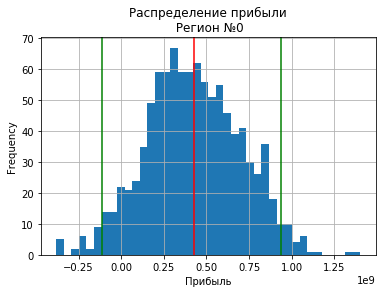

In [39]:
profit_distrib0.plot(kind='hist', grid=True, bins=40)
plt.axvline(x=profit_mean0, color='red')
plt.axvline(x=lower0, color='green')
plt.axvline(x=upper0, color='green')
plt.title('Распределение прибыли\n Регион №0')
plt.xlabel('Прибыль')
plt.show()

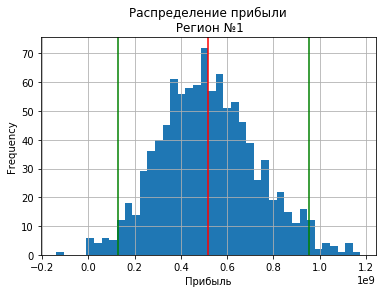

In [40]:
profit_distrib1.plot(kind='hist', grid=True, bins=40)
plt.axvline(x=profit_mean1, color='red')
plt.axvline(x=lower1, color='green')
plt.axvline(x=upper1, color='green')
plt.title('Распределение прибыли\n Регион №1')
plt.xlabel('Прибыль')
plt.show()

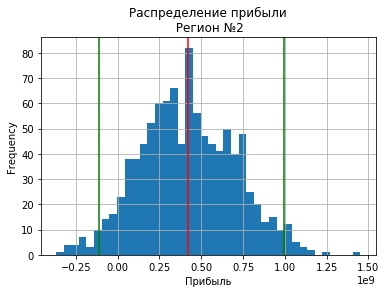

In [41]:
profit_distrib2.plot(kind='hist', grid=True, bins=40)
plt.axvline(x=profit_mean2, color='red')
plt.axvline(x=upper2, color='green')
plt.axvline(x=lower2, color='green')
plt.title('Распределение прибыли\n Регион №2')
plt.xlabel('Прибыль')
plt.show()

Найдем вероятности убытка - долю значений лежащих ниже 10 млрд.

In [42]:
prob_loss0 = profit_distrib0[profit_distrib0 < 0].count() / len(profit_distrib0) * 100
print(f'Риск убытка в регионе №0: {prob_loss0}%')

Риск убытка в регионе №0: 6.3%


In [43]:
# проверка
profit_distrib0.quantile(0.063) 

1160743.8142981639

6.3 процентиль действительно дает результат более 10 млрд

In [44]:
prob_loss1 = profit_distrib1[profit_distrib1 < 0].count() / len(profit_distrib1) * 100

In [45]:
prob_loss2 = profit_distrib2[profit_distrib2 < 0].count() / len(profit_distrib2) * 100

Соберем все данные в таблицу

In [46]:
profit['Риск убытка, %'] = [prob_loss0, prob_loss1, prob_loss2]
profit

,Среднее,Нижняя граница дов инт,Верхняя граница дов инт,"Риск убытка, %"
0,4.249364e+08,-1.097049e+08,9.390009e+08,6.3
1,5.182609e+08,1.281232e+08,9.536130e+08,0.3
2,4.184311e+08,-1.105823e+08,9.934925e+08,6.1


**Вывод**

Наибольшую среденюю прибыль показывают скважины региона №1. Риск убытков составляет в этом регионе менее процента. Вероятно, это связано с видом распределения объема запасов в скважинах этого региона: оно имеет моду в наибольших значениях. Регион №1 наиболее перспективен

## Вывод

Цель проекта: определить, где бурить новую скважину. Для этого получены характеристики скважин в трёх регионах, на которых построена модель для определения региона, где добыча принесёт наибольшую прибыль.

1. На первом этапе были загружены данные для трех регионов. Построены матрицы для попарных точечных диаграмм для столбцов датафреймов. Было обнаружено, что для региона №1 признак f2 сильно коррелирует с объемом запасов в скважинах. 
2. Подготовка данных к обучению. Выделен целевой признак `product` - объем запасов. Данные были разбиты на обучающий и тестовый наборы. Проведено масштабирование признаков с помощью z-преобразования.
3. Для модели линейной регрессии были получены предсказания для тестовой выборки, вычеслена ошибка RMSE для предсказанных средних объемов. Для регионов № 0 и №2 ошибка RMSE довольно большая (практически половина от значения). Регион №1 имеет очень маленькую RMSE (менее 1). Вероятно, это связано с сильной корреляцией целевого признака с признаком f2 для этого региона. Предсказанное средние значение у региона № 1, так же как и для истинного среднего, меньше, чем в других регионах.

In [47]:
result

,Регион,Настоящее среднее,Предсказаное среднее,RMSE
0,0,92.07860,92.07938,37.57485
1,1,68.72314,68.72314,0.89320
2,2,94.88423,94.88226,40.03125


4. Посчитано минимальное среднее количество продукта в месторождениях региона достаточное для разработки (111 тыс. баррелей) и сравнено со средними для предсказанных значений. Во всех трех регионах среднее меньше.
5. Написана функция для расчёта прибыли по выбранным скважинам и предсказаниям модели: она выделяет скважины с максимальным значением спрогнозированных запасов и рассчитывает прибыль (по целевому признаку), которую можно пполучить из них.
6. Найдено распределение прибыли с помощью техники Bootstrap. Найдена средняя прибыль и 95% доверительный интервал для среднего. Подсчитан риск убытка в каждом регионе.

In [48]:
profit

,Среднее,Нижняя граница дов инт,Верхняя граница дов инт,"Риск убытка, %"
0,4.249364e+08,-1.097049e+08,9.390009e+08,6.3
1,5.182609e+08,1.281232e+08,9.536130e+08,0.3
2,4.184311e+08,-1.105823e+08,9.934925e+08,6.1


**Наиболее перспективный регион №1, поскольку он имеет наибольшее среднее и наименьший риск убытка.**